In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

img = cv2.imread("images_full/frame65.jpg")
#img = cv2.imread("../GTSDB/test/00619.jpg")

@interact
def fins_canny(dist=widgets.IntSlider(value=200, min=0, max=1000), min_val=widgets.IntSlider(value=560, min=0, max=1000), max_val=widgets.IntSlider(value=400, min=0, max=1000)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    edges = cv2.Canny(gray, min_val, max_val)
    plt.imshow(edges, cmap='gray')
    plt.show()
    lines = cv2.HoughLines(edges, 1, np.pi/180, dist)
    if lines is not None:
        for line in lines:
            rho,theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 10000*(-b))
            y1 = int(y0 + 10000*(a))
            x2 = int(x0 - 10000*(-b))
            y2 = int(y0 - 10000*(a))
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),1)
    """
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=1)
    for line in lines:
       x1, y1, x2, y2 = line[0]
       cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 1)
    """
    plt.figure(figsize=(9.5, 6))
    plt.imshow(img)

interactive(children=(IntSlider(value=200, description='dist', max=1000), IntSlider(value=560, description='mi…

Bones parelles de valors: (261, 563), (341, 539)

In [2]:
#img = cv2.imread("../GTSDB/test/00619.jpg")
img = cv2.imread("images_full/frame65.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fld = cv2.ximgproc.createFastLineDetector()
lines = fld.detect(gray)
result_img = fld.drawSegments(gray,lines)
#plt.imshow(result_img)

(5163, 1, 4)


[ WARN:0@6.177] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../GTSDB/test/00619.jpg'): can't open/read file: check file path/integrity
/tmp/ipykernel_15004/2183468386.py:18: RuntimeWarning: divide by zero encountered in float_scalars
  theta = math.atan((y2-y1)/(x2-x1))


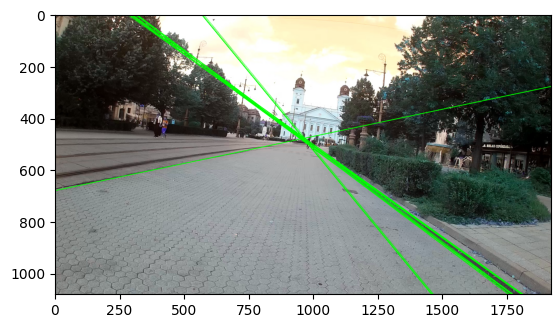

In [3]:
import math

print(lines.shape)
fld = cv2.ximgproc.createFastLineDetector()
img = cv2.imread("../GTSDB/test/00619.jpg")
img = cv2.imread("images_full/frame65.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lines = fld.detect(gray)

for line in lines:
    #print(line.shape)
    min_theta = 0.2
    x1 = line[0][0]
    y1 = line[0][1]
    x2 = line[0][2]
    y2 = line[0][3]
    theta = math.atan((y2-y1)/(x2-x1))
    dist = np.linalg.norm((x1-x2,y1-y2))
    if dist > 100 and abs(theta) > min_theta and abs(theta) < math.pi/2 - min_theta:
        vec_x = x2-x1
        vec_y = y2-y1
        fact = 10000
        #cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        cv2.line(img,(int(x1+fact*vec_x), int(y1+fact*vec_y)),(int(x2-fact*vec_x),int(y2-fact*vec_y)),(0,255,0),2)
plt.imshow(img)

In [4]:
def extend_lines(lines, fact = 10000):
    lines = np.squeeze(lines)
    extended = []
    for line in lines:
        x1 = line[0]
        y1 = line[1]
        x2 = line[2]
        y2 = line[3]
        vec_x = x2-x1
        vec_y = y2-y1
    extended.append([int(x1+fact*vec_x), int(y1+fact*vec_y), int(x2-fact*vec_x),int(y2-fact*vec_y)])
    return extended

In [5]:
def intersect(P0,P1):
    """P0 and P1 are NxD arrays defining N lines.
    D is the dimension of the space. This function 
    returns the least squares intersection of the N
    lines from the system given by eq. 13 in 
    http://cal.cs.illinois.edu/~johannes/research/LS_line_intersect.pdf.
    """
    # generate all line direction vectors 
    n = (P1-P0)/np.linalg.norm(P1-P0,axis=1)[:,np.newaxis] # normalized

    # generate the array of all projectors 
    projs = np.eye(n.shape[1]) - n[:,:,np.newaxis]*n[:,np.newaxis]  # I - n*n.T
    # see fig. 1 

    # generate R matrix and q vector
    R = projs.sum(axis=0)
    q = (projs @ P0[:,:,np.newaxis]).sum(axis=0)

    # solve the least squares problem for the 
    # intersection point p: Rp = q
    p = np.linalg.lstsq(R,q,rcond=None)[0]

    return p

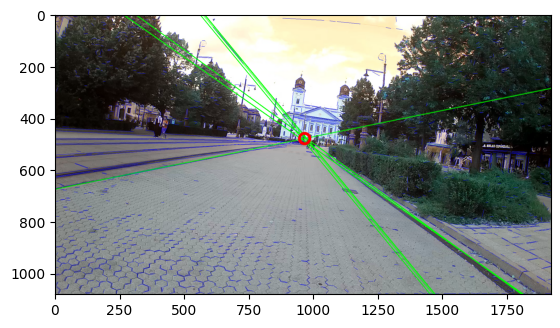

In [6]:
img = cv2.imread("images_full/frame65.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lsd = cv2.createLiimg = cv2.imread("images_full/frame65.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lsd = cv2.createLineSegmentDetector(0)
lines = lsd.detect(gray)[0] #Position 0 of the returned tuple are the detected lines
drawn_img = lsd.drawSegments(img,lines)
plt.imshow(drawn_img)

count = 0
a = []
b = []

for line in lines:
    #print(line)
    min_theta = 0.2
    x1 = line[0][0]
    y1 = line[0][1]
    x2 = line[0][2]
    y2 = line[0][3]
    theta = math.atan((y2-y1)/(x2-x1))
    dist = np.linalg.norm((x1-x2,y1-y2))
    if dist > 100 and abs(theta) > min_theta and abs(theta) < math.pi/2 - min_theta:
        a.append([x1, y1])
        b.append([x2, y2])
        count += 1
        vec_x = x2-x1
        vec_y = y2-y1
        fact = 10000
        #cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        cv2.line(img,(int(x1+fact*vec_x), int(y1+fact*vec_y)),(int(x2-fact*vec_x),int(y2-fact*vec_y)),(0,255,0),2)
if(len(a) > 0):    
    point = intersect(np.array(a),np.array(b))
    cv2.circle(img, (int(point[0][0]), int(point[1][0])), 20, (255,0,0), 10)
plt.imshow(img)


